In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('resto_preprocessed.csv', delimiter=";")

In [ ]:
dataset.head()

,Avg Spend Level,District,subdistrict,Highest Price,Lowest Price,Average Price,Popularity,Category_Aneka nasi,Category_Ayam & bebek,Category_Bakmie,...,Category_Korea,Category_Martabak,Category_Minuman,Category_Pizza & pasta,Category_Roti,Category_Sate,Category_Seafood,Category_Sweets,Category_Thailand,Category_Timur Tengah
0,1,11,67,1400000,3000,53614,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2,11,67,65000,2000,18509,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,11,67,48000,3000,20893,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,11,142,18300,3500,12227,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,10,89,35000,4000,19430,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [251]:
x = dataset.iloc[:, [2,5]].values
y = dataset.iloc[:, 6].values

In [252]:
print(x)

[[   67 53614]
 [   67 18509]
 [   67 20893]
 ...
 [  119 38708]
 [  143 26000]
 [   14 15925]]


In [253]:
print(y)

[0 0 0 ... 0 0 0]


In [254]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [255]:
print(x_train)

[[    70  44053]
 [   150  11042]
 [   110  11314]
 ...
 [   166  23888]
 [   106 139842]
 [    10  85490]]


In [256]:
len(x_train)

18848

In [257]:
len(x)

25131

In [258]:
len(x_test)

6283

In [259]:
len(y)

25131

In [260]:
len(y_test)

6283

In [261]:
len(y_train)

18848

In [262]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [264]:
print(x_train)

[[-0.56103369  0.76333197]
 [ 1.04722832 -0.64649099]
 [ 0.24309732 -0.63487451]
 ...
 [ 1.36888073 -0.09786824]
 [ 0.16268422  4.85425719]
 [-1.7672302   2.53300979]]


In [265]:
print(x_test)

[[-0.29969111 -0.31730026]
 [ 0.86629885 -0.69889331]
 [-0.46051731 -0.79285019]
 ...
 [-0.15896818  0.89060084]
 [-0.82237626  0.70097877]
 [-1.56619744  0.05195028]]


In [266]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [267]:
y_pred = classifier.predict(x_test)

In [268]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3204    4  484]
 [  11   18    3]
 [ 573    5 1981]]


In [269]:
correct_predictions = np.trace(cm)
total_samples = len(y_test)
accuracy = correct_predictions / total_samples
print("Accuracy : ", accuracy)


Accuracy :  0.8281075919146904


In [271]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')


def display_knn_plot(x_data, y_data, classifier, title):
    plt.figure()
    plot_decision_regions(x_data, y_data, classifier=classifier)
    plt.xlabel(dataset.columns[2])
    plt.ylabel(dataset.columns[5])
    plt.legend(loc='upper left')
    plt.title(title)
    plt.show()



<ipython-input-271-3d1b16a72a67>:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


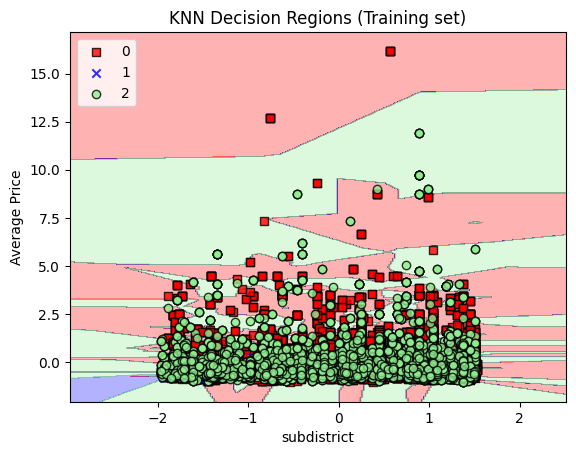

In [274]:
# Overlapping markers might indicate that KNN is not the best algorithm for this dataset
display_knn_plot(x_train, y_train, classifier,
                 'KNN Decision Regions (Training set)')

<ipython-input-271-3d1b16a72a67>:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


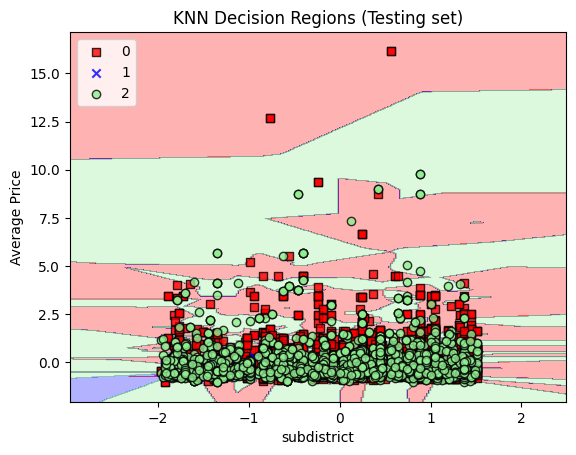

In [273]:
display_knn_plot(x_test, y_test, classifier, 'KNN Decision Regions (Testing set)')
